<h1><center> EKSPLORASI DERET WAKTU  </center></h1><center>Laily Nissa A.M </center>

<center>
_____________________________________________________________________________________________________________________________
</center>


In [1]:
#Install terlebih dahulu package PythonTsa
!pip install PythonTsa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig

import warnings
warnings.filterwarnings("ignore")

## Ilustrasi Data Empiris 1

Contoh data empiris pertama adalah indeks rata-rata bulanan osilasi Atlantik Utara (NAO) sejak Januari 1950 sampai Februari 2024. Indeks NAO penting untuk penelitian cuaca dan didasarkan pada perbedaan tekanan permukaan laut antara subtropis (Azores) yang tinggi dan subkutub rendah.

In [3]:
link = "https://ftp.cpc.ncep.noaa.gov/cwlinks/norm.daily.nao.cdas.z500.19500101_current.csv"
nao=pd.read_csv(link)

In [4]:
#melihat struktur data
nao.dtypes

,0
year,int64
month,int64
day,int64
nao_index_cdas,float64


In [5]:
# melihat 5 data pertama
nao.head()

,year,month,day,nao_index_cdas
0,1950,1,1,0.365
1,1950,1,2,0.096
2,1950,1,3,-0.416
3,1950,1,4,-0.616
4,1950,1,5,-0.261


In [6]:
#melihat 5 data terakhir
nao.tail()

,year,month,day,nao_index_cdas
27437,2025,2,13,0.111362
27438,2025,2,14,0.306025
27439,2025,2,15,0.089193
27440,2025,2,16,-0.280299
27441,2025,2,17,-0.447491


In [7]:
#cek missing values
nao.isnull().sum()

,0
year,0
month,0
day,0
nao_index_cdas,2


terdapat 2 nilai amaan yang kosong atau NA

In [8]:
import numpy as np

In [9]:
#mendapatkan indeks amatan yang missing values
np.where(nao.isnull())[0]

array([20752, 20844])

In [10]:
nao.iloc[[20752,20844],:]

,year,month,day,nao_index_cdas
20752,2006,10,26,NaN
20844,2007,1,26,NaN


In [11]:
#imputasi missing values dengan angka 0
nao.fillna(0,inplace=True)

In [12]:
nao.isnull().sum()

,0
year,0
month,0
day,0
nao_index_cdas,0


In [13]:
# Mengubah kolom year, month, dan day menjadi tipe data integer
nao['year'] = nao['year'].astype(int)
nao['month'] = nao['month'].astype(int)
nao['day'] = nao['day'].astype(int)

# Membuat satu kolom baru bernama 'date' yang berisi kombinasi kolom year, month, dan day
nao['date'] = pd.to_datetime(nao[['year', 'month', 'day']])


In [14]:
nao.head()

,year,month,day,nao_index_cdas,date
0,1950,1,1,0.365,1950-01-01
1,1950,1,2,0.096,1950-01-02
2,1950,1,3,-0.416,1950-01-03
3,1950,1,4,-0.616,1950-01-04
4,1950,1,5,-0.261,1950-01-05


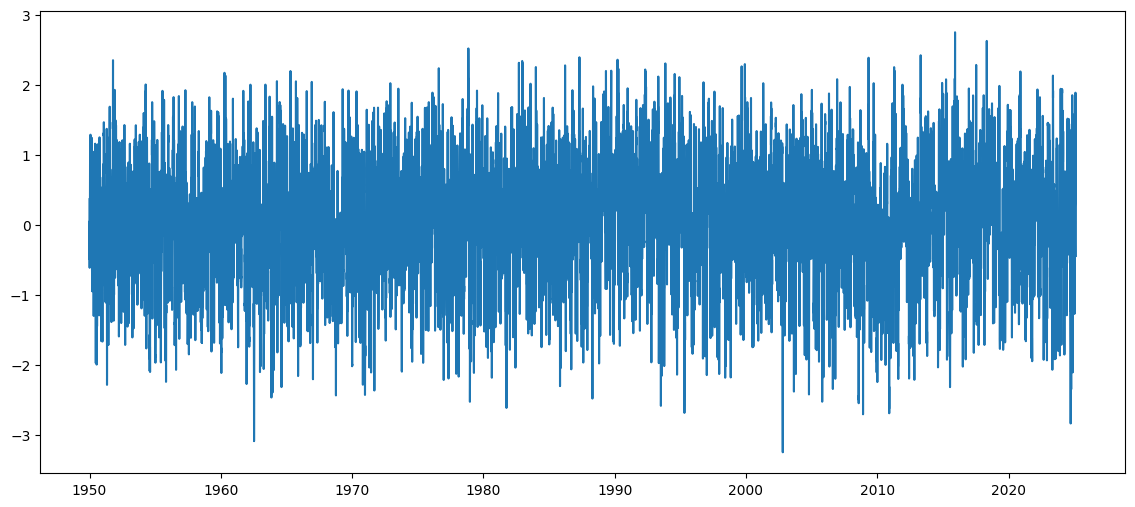

In [15]:
plt.figure(figsize=(14,6))
plt.plot(nao['date'],nao['nao_index_cdas']); plt.show()

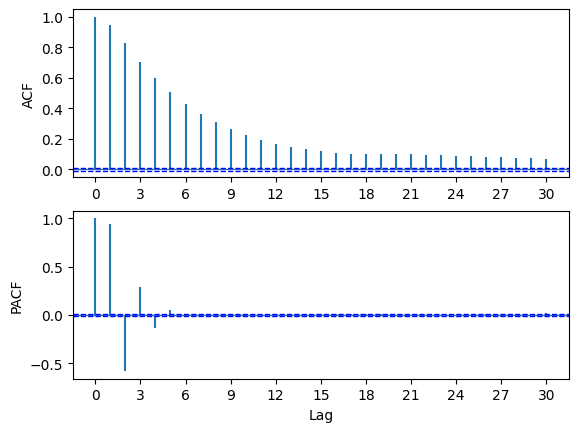

In [16]:
# membuat plot ACF dan PACF contoh dari data nao
acf_pacf_fig(nao['nao_index_cdas'], both=True, lag=30)

Berdasarkan plot ACF dan PACF contoh yang diperoleh apakah deret stasioner? Mengapa?

In [17]:
# uji unit-root Augmented Dickey Fuller
from statsmodels.tsa.stattools import adfuller

adfuller(nao['nao_index_cdas'])[1]

0.0

Bagaimana interpretasi hasil uji tersebut? Apakah interpretasi hasil uji sama dengan interpretasi dari plot deret maupun plot ACF?

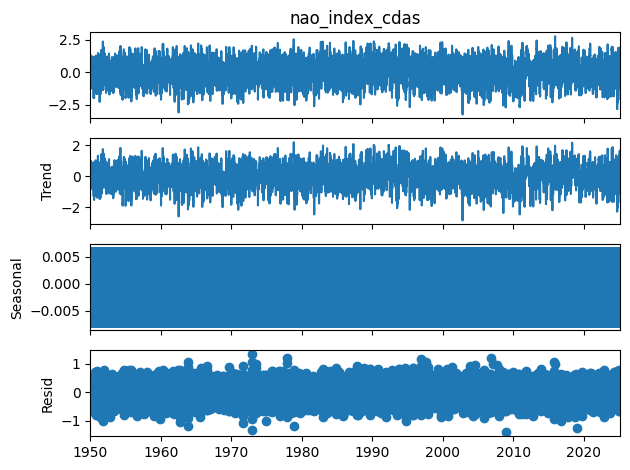

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
nao2=nao.set_index('date')
result = seasonal_decompose(nao2['nao_index_cdas'], model='additive')
result.plot()
plt.show()

Jika dilihat dari hasil dekomposisi tersebut apa interpretasi Anda? Bagaimana keterkaitan hasil dekomposisi dengan interpretasi Anda dari plot ACF dan uji ADF?

Jika dilihat berdasarkan plot deret apakah deret sudah stasioner dalam ragam?

Secara uji untuk melihat kestasioneran deret dalam ragam dapat dilihat dari nilai lambda dari boxcox. Jika nilai lambda 1 atau angka 1 masuk dalam interval kepercayaan lambda, maka dapat dikatakan bahwa deret sudah stasioner dalam ragam.

Dalam melakukan transformasi boxcox, perlu diperhatikan bahwa nilai deret harus positif semua. Jika ada nilai deret yang negatif ataupun nol maka deret harus ditransformasi agar nilainya menjadi positif.

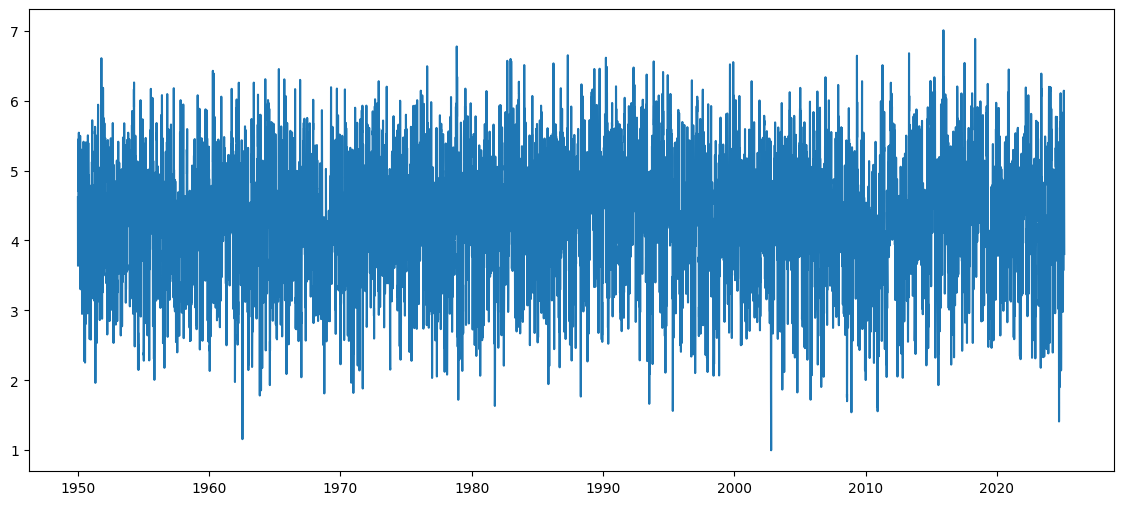

In [19]:
# Transformasi kolom 'nao_index_cdas' agar bernilai positif
nao['nao_index_cdas_positive'] = nao['nao_index_cdas'] - nao['nao_index_cdas'].min() + 1

# Plot data baru
plt.figure(figsize=(14,6))
plt.plot(nao['date'],nao['nao_index_cdas_positive']); plt.show()

In [20]:
from scipy.stats import boxcox,  boxcox_llf
data,lambda_fit,ci=boxcox(nao['nao_index_cdas_positive'], alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  1.274253749480692
interval kepercayaan lambda: (1.223884812400362, 1.3248030051714592)


Bagaimana interpretasi Anda dari nilai lambda yang diperoleh?

Misalkan data yang digunakan diagregasikan dari data harian menjadi data bulanan. (Disclaimer: Hal ini dilakukan hanya untuk tujuan eksplorasi, bukan suatu tahapan yang dilakukan untuk menangani suatu isu tertentu dalam deret waktu)

In [21]:
#agregasi data sebagai nilai rata-rata bulanan
naos=nao.groupby(['year','month'])['nao_index_cdas'].mean()

In [22]:
type(naos)

pandas.core.series.Series

In [23]:
timeindex=pd.date_range('1950-01', periods=len(naos),freq='M')

In [24]:
naos.index=timeindex

In [25]:
naos.head()

,nao_index_cdas
1950-01-31,0.463516
1950-02-28,0.420714
1950-03-31,0.008387
1950-04-30,0.239433
1950-05-31,-0.261226


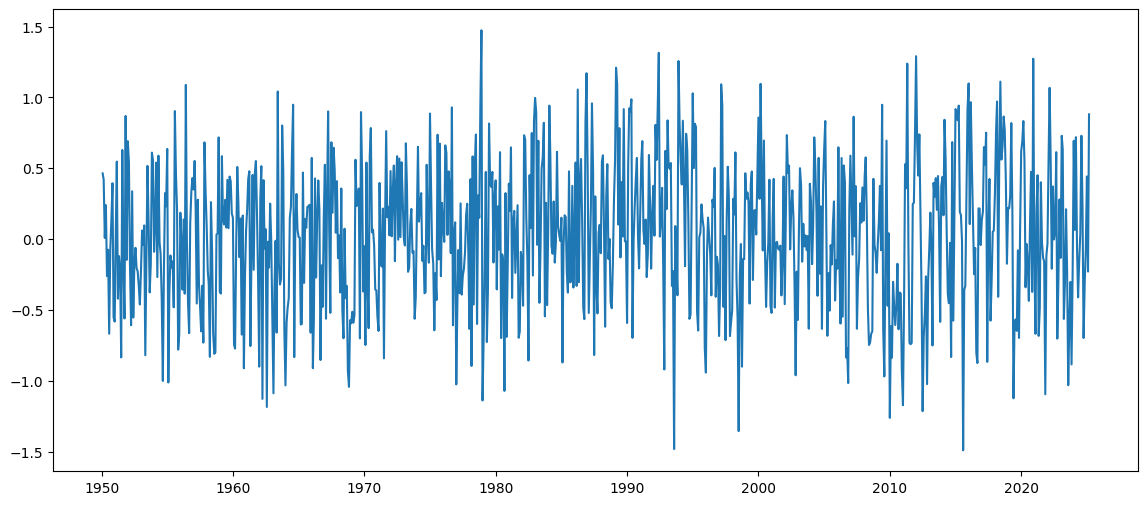

In [26]:
#plot deret waktu
plt.figure(figsize=(14,6))
plt.plot(naos); plt.show()

Apa perbedaan yang dapat Anda temukan setelah data dilakukan agregasi bulanan?

In [27]:
#ringkasan statistika deret
naos.describe()

,nao_index_cdas
count,902.000000
mean,0.027046
std,0.511543
min,-1.490336
25%,-0.331210
50%,0.032710
75%,0.407883
max,1.473500


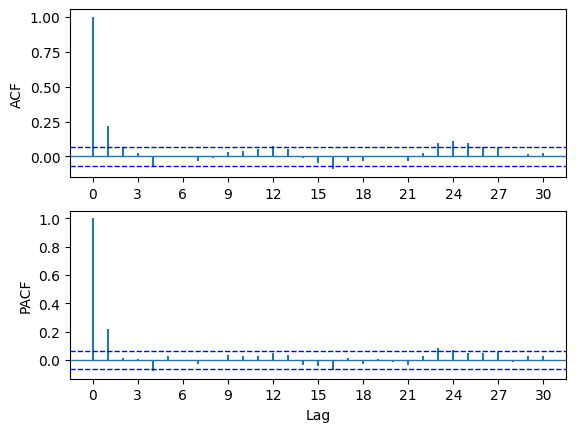

In [28]:
#plot acf dan pacf contoh
acf_pacf_fig(naos, both=True, lag=30); plt.show()

Bagaimana interpretasi Anda dari plot ACF dan PACF tersebut?

Alat lain yang dapat digunakan untuk memeriksa kestasioneran deret adalah uji Akar-Satuan.

Uji akar satuan yang pertama adalah uji akar-satuan Dickey Fuller (ADF test). Hipotesis yang digunakan dalam uji ADF adalah

$H_0:$ menyatakan deret tidak stasioner

$H_1:$ menyatakan deret stasioner.

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
adfuller(naos, autolag='AIC')[1]

0.0

Karena p-value yang diperoleh kurang dari 0.05, dalam hal ini kita tolak $H_0$ sehingga kita yakin bahwa deret tersebut stasioner.

Uji akar-satuan yang lain adalah Kwiatkowski-Phillips-Schmidt-Shin (KPSS). Hipotesis dalam uji KPSS adalah

$H_0:$ deret stasioner

$H_1:$ deret tidak stasioner

In [31]:
sm.tsa.stattools.kpss(naos, regression="c", nlags=50)[1]

0.1

Karena p-value yang diperoleh lebih besar dari 0.05, dalam hal ini kita tidak tolak $H_0$ sehingga kita katakan bahwa deret tersebut stasioner.

Menguraikan deret waktu menjadi komponen-komponen penyusunnya terkadang juga membantu dalam proses eksplorasi deret. Secara umum suatu deret waktu terdiri atas 2 komponen, yaitu komponen sistematik dan non-sistematik.

Komponen sistematik adalah komponen yang bersifat konsisten dan berulang dalam deret. Komponen ini dapat dimodelkan. Komponen sistematik dari deret waktu terdiri dari komponen kecenderungan (trend) dan musiman (seasonality).

Sementara komponen non-sistematik adalah komponen acak dalam deret waktu yang tidak dapat dimodelkan secara langsung.

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

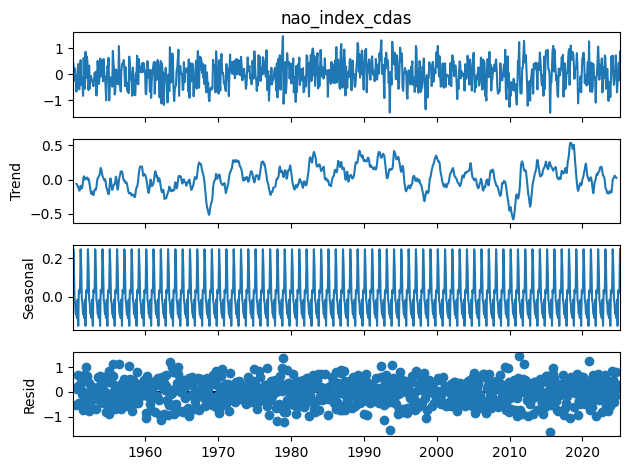

In [33]:
result = seasonal_decompose(naos, model='additive')
result.plot()
plt.show()

In [34]:
naos_positif = naos - naos.min() + 1

In [35]:
from scipy.stats import boxcox,  boxcox_llf
data,lambda_fit,ci=boxcox(naos_positif, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  1.082828111756799
interval kepercayaan lambda: (0.8143314333060174, 1.3558402598653283)


## Ilustrasi Data Empiris 2

Contoh data empiris kedua adalah deret rata-rata suhu tahunan di Hew Haven (dalam Fahrenheit) tahun 1912-1971.

In [36]:
# menginstall package pydataset
!pip install pydataset

In [37]:
from pydataset import data
nhtemp=data('nhtemp')

In [38]:
nhtemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    60 non-null     int64  
 1   nhtemp  60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [39]:
nhtemp.head()

,time,nhtemp
1,1912,49.9
2,1913,52.3
3,1914,49.4
4,1915,51.1
5,1916,49.4


In [40]:
nhtemp['time'] = pd.date_range(start='1912', periods=len(nhtemp), freq='Y')
nhtemp.set_index('time', inplace=True)

In [41]:
nhtemp.head()

,nhtemp
time,
1912-12-31,49.9
1913-12-31,52.3
1914-12-31,49.4
1915-12-31,51.1
1916-12-31,49.4


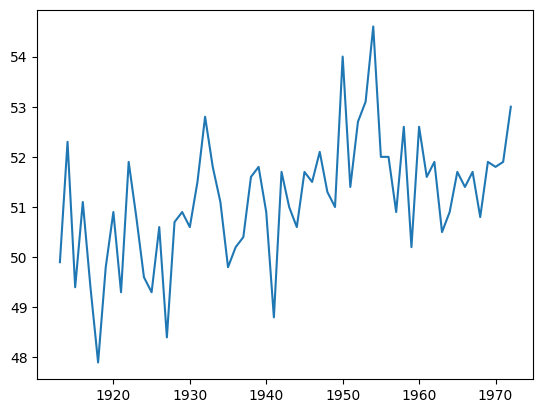

In [42]:
plt.plot(nhtemp); plt.show()

Berdasarkan plot apakah deret tampak stasioner?

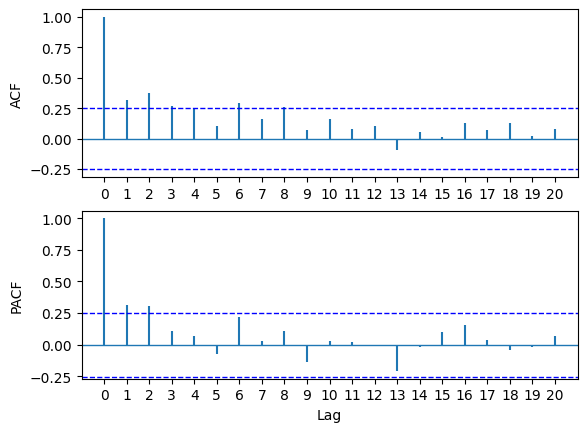

In [43]:
#plot acf dan pacf contoh
acf_pacf_fig(nhtemp, both=True, lag=20); plt.show()

In [44]:
adfuller(nhtemp, autolag='AIC')[1]

0.04270393882793662

In [45]:
sm.tsa.stattools.kpss(nhtemp, regression="c", nlags=50)[1]

0.06459064801389587

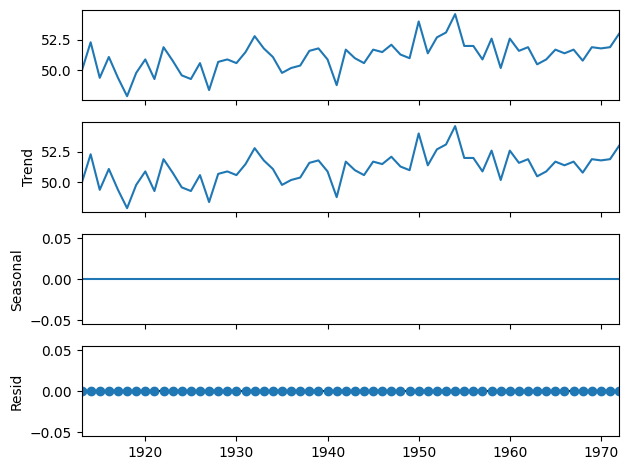

In [46]:
result = seasonal_decompose(nhtemp, model='additive')
result.plot()
plt.show()

In [47]:
from scipy.stats import boxcox,  boxcox_llf
data,lambda_fit,ci=boxcox(nhtemp.nhtemp, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  1.8838880717167357
interval kepercayaan lambda: (-5.881049645767782, 9.544545267023773)


Bagaimana interpretasi hasil dari plot ACF, dekomposisi, dan boxcox? Apakah semuanya mengarah pada deret yang stasioner?

## PEMULUSAN DALAM DERET WAKTU

Pemulusan (smoothing) dalam deret waktu dilakukan untuk menghilangkan fluktuasi acak (noise) sehingga pola yang lebih jelas, seperti tren atau musiman, dapat terlihat.



**Single Moving Average (SMA)**

Single Moving Average (SMA) adalah metode pemulusan yang menghitung rata-rata bergerak dari sejumlah periode tertentu.

$SMA_t=\frac{X_t+X_{t-1}+...+X_{t-n+1}}{n}$

dengan $n$ adalah periode yang digunakan untuk menghitung rata-rata.

Pemulusan dengan metode SMA digunakan untuk deret yang tidak memiliki kecenderungan (tren)

**Double Mooving Average (DMA)**

Double Moving Average (DMA) adalah pengembangan dari SMA, di mana dua kali perhitungan SMA dilakukan:

- SMA pertama dihitung dari data asli.

- SMA kedua dihitung dari hasil SMA pertama.

DMA sering digunakan untuk mendeteksi kecenderungan (tren) dengan mengurangi fluktuasi lebih lanjut dibandingkan SMA. DMA cocok digunakan untuk deret yang memiliki kecenderungan linear.

**Single Exponential Smoothing (SES)**

Single Exponential Smoothing (SES) adalah metode pemulusan eksponensial yang memberikan bobot lebih besar pada data terbaru dibandingkan data lama.

$S_t=\alpha X_t+(1-\alpha)S_t$

dengan,

$S_t$ adalah nilai pemulusan pada waktu t

$X_t$ adalah nilai asli deret

$\alpha$ adalah parameter pemulusan $(0<\alpha<1)$

SES cocok digunakan untuk deret yang tidak memiliki kecenderungan (tren) ataupun musiman (seasonal).

**Double Exponential Smoothing (DES)**

Double Exponential Smoothing (DES), juga dikenal sebagai Metode Holt, adalah pengembangan SES yang dapat menangani tren.

$S_t=\alpha X_t+(1-\alpha)(S_{t-1}+b_{t-1})$

$b_t=\beta (S_t-S_{t-1})+(1-\beta)b_{t-1}$

dengan,

$b_t$: penduga tren

$\beta$:parameter pemulusan tren

DES cocok digunakan untuk deret yang memiliki tren (tanpa musiman).



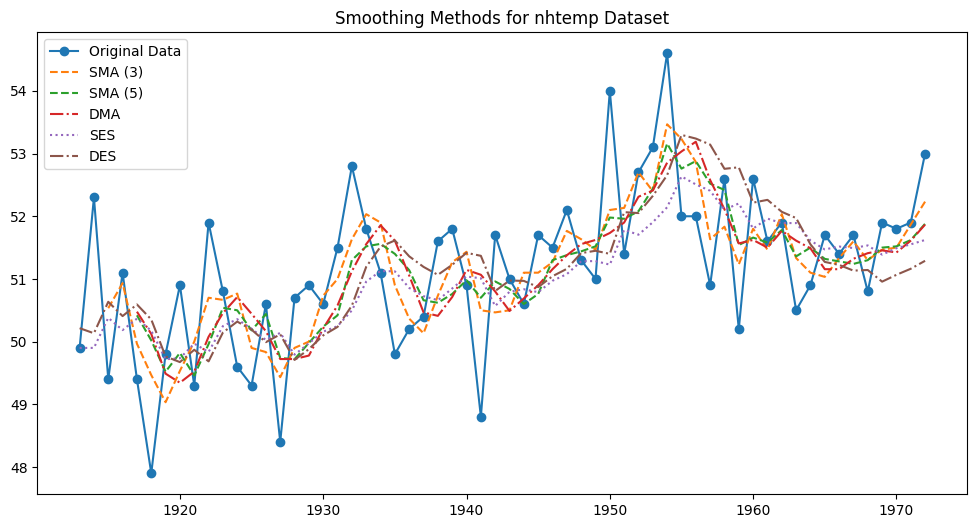

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Single Moving Average (SMA)
nhtemp['SMA_3'] = nhtemp['nhtemp'].rolling(window=3).mean()
nhtemp['SMA_5'] = nhtemp['nhtemp'].rolling(window=5).mean()

# Double Moving Average (DMA)
nhtemp['DMA'] = nhtemp['SMA_3'].rolling(window=3).mean()

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(nhtemp['nhtemp']).fit(smoothing_level=0.2, optimized=False)
nhtemp['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES)
des_model = ExponentialSmoothing(nhtemp['nhtemp'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=False)
nhtemp['DES'] = des_model.fittedvalues

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(nhtemp['nhtemp'], label='Original Data', marker='o')
plt.plot(nhtemp['SMA_3'], label='SMA (3)', linestyle='--')
plt.plot(nhtemp['SMA_5'], label='SMA (5)', linestyle='--')
plt.plot(nhtemp['DMA'], label='DMA', linestyle='-.')
plt.plot(nhtemp['SES'], label='SES', linestyle=':')
plt.plot(nhtemp['DES'], label='DES', linestyle='-.')
plt.legend()
plt.title('Smoothing Methods for nhtemp Dataset')
plt.show()
